In [31]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from operator import add

In [32]:
pastas = os.listdir('output/')
aquivos = [os.listdir(f'output/{x}/') for x in pastas]
pastas

['gulosa_invertida', 'gulosa', 'aleatoria_invertida', 'aleatoria']

In [33]:
l0=[]
for e, pasta in zip(aquivos,pastas):
    l1=[]
    for arq in e:
        l2 = []
        with open(f'output/{pasta}/{arq}') as f:
            for line in f:
                # For Python3, use print(line)
                l2.append(int(line.split()[1]))
        l1.append(l2)
    l0.append(l1)
print(len(l0))
df_gu_inv = pd.DataFrame(l0[0],columns = ['Tempo','max','n_filmes','n_cat','tamanho','horas']).dropna()
df_gu = pd.DataFrame(l0[1],columns = ['Tempo','max','n_filmes','n_cat','tamanho','horas']).dropna()
df_ale = pd.DataFrame(l0[2],columns = ['Tempo','max','n_filmes','n_cat','tamanho','horas']).dropna()
df_ale_inv = pd.DataFrame(l0[3],columns = ['Tempo','max','n_filmes','n_cat','tamanho','horas']).dropna()

4


In [34]:
df_gu_inv.to_csv('dataframes/gulosa_inv.csv',index=False)
df_gu.to_csv('dataframes/gulosa.csv',index=False)
df_ale.to_csv('dataframes/aleatoria.csv',index=False)
df_ale_inv.to_csv('dataframes/aleatoria_inv.csv',index=False)

In [6]:
df_gu_inv['Tempo'] = df_gu_inv['Tempo'].apply(lambda x: x*1e-9)
df_gu['Tempo'] = df_gu['Tempo'].apply(lambda x: x*1e-9)
df_ale['Tempo'] = df_ale['Tempo'].apply(lambda x: x*1e-9)
df_ale_inv['Tempo'] = df_ale_inv['Tempo'].apply(lambda x: x*1e-9)

In [7]:
lista1=[0]*len(df_gu.sort_values(by=['n_filmes'])['n_cat'].unique())
for e in df_gu.sort_values(by=['n_filmes'])['n_cat'].unique():
    temp1 = df_gu[df_gu['n_cat']==e].sort_values(by=['n_filmes'])
    lista1=[sum(x)for x in zip(lista1,temp1.Tempo)]

lista2=[0]*len(df_ale.sort_values(by=['n_filmes'])['n_cat'].unique())
for e in df_ale.sort_values(by=['n_filmes'])['n_cat'].unique():
    temp2 = df_ale[df_ale['n_cat']==e].sort_values(by=['n_filmes'])
    lista2=[sum(x)for x in zip(lista2,temp2.Tempo)]

listaa=[0]*len(df_gu_inv.sort_values(by=['n_filmes'])['n_cat'].unique())
for e in df_gu_inv.sort_values(by=['n_filmes'])['n_cat'].unique():
    tempa = df_gu_inv[df_gu_inv['n_cat']==e].sort_values(by=['n_filmes'])
    listaa=[sum(x)for x in zip(listaa,tempa.Tempo)]

listab=[0]*len(df_ale_inv.sort_values(by=['n_filmes'])['n_cat'].unique())
for e in df_ale_inv.sort_values(by=['n_filmes'])['n_cat'].unique():
    tempb = df_ale_inv[df_ale_inv['n_cat']==e].sort_values(by=['n_filmes'])
    listab=[sum(x)for x in zip(listab,tempb.Tempo)]

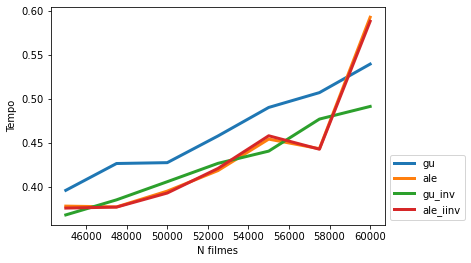

In [8]:
plt.plot(temp2['n_filmes'],lista1,label='gu',linewidth=3)
plt.plot(temp2['n_filmes'],lista2,label='ale',linewidth=3)
plt.plot(temp2['n_filmes'],listaa,label='gu_inv',linewidth=3)
plt.plot(temp2['n_filmes'],listab,label='ale_iinv',linewidth=3)

plt.ylabel("Tempo")
plt.xlabel("N filmes")
plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show() #[sum(x) for x in zip(list1, list2)]

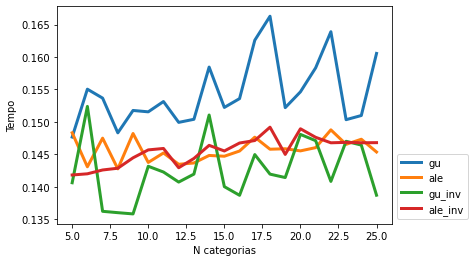

In [9]:
lista3=[0]*21
for e in df_gu.sort_values(by=['n_cat'])['n_filmes'].unique():
    temp1 = df_gu[df_gu['n_filmes']==e].sort_values(by=['n_cat'])
    lista3=[sum(x)for x in zip(lista3,temp1.Tempo)]

lista4=[0]*21
for e in df_ale.sort_values(by=['n_cat'])['n_filmes'].unique():
    temp2 = df_ale[df_ale['n_filmes']==e].sort_values(by=['n_cat'])
    lista4=[sum(x)for x in zip(lista4,temp2.Tempo)]

lista5=[0]*21
for e in df_gu_inv.sort_values(by=['n_cat'])['n_filmes'].unique():
    temp5 = df_gu_inv[df_gu_inv['n_filmes']==e].sort_values(by=['n_cat'])
    lista5=[sum(x)for x in zip(lista5,temp5.Tempo)]

lista6=[0]*21
for e in df_ale_inv.sort_values(by=['n_cat'])['n_filmes'].unique():
    temp6 = df_ale_inv[df_ale_inv['n_filmes']==e].sort_values(by=['n_cat'])
    lista6=[sum(x)for x in zip(lista6,temp6.Tempo)]

plt.plot(temp1['n_cat'],lista3,label='gu',linewidth=3)
plt.plot(temp2['n_cat'],lista4,label='ale',linewidth=3)
plt.plot(temp1['n_cat'],lista5,label='gu_inv',linewidth=3)
plt.plot(temp2['n_cat'],lista6,label='ale_inv',linewidth=3)

plt.ylabel("Tempo")
plt.xlabel("N categorias")
plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show() #[sum(x) for x in zip(list1, list2)]

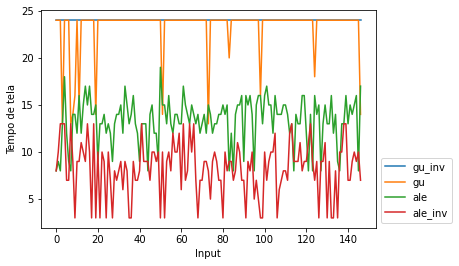

In [19]:
dfs = [df_gu_inv,df_gu,df_ale, df_ale_inv]
plt.plot(df_gu_inv.index,df_gu_inv.horas,label='gu_inv',linewidth=1.5)
plt.plot(df_gu.index,df_gu.horas,label='gu',linewidth=1.5)
plt.plot(df_ale.index,df_ale.horas,label='ale',linewidth=1.5)
plt.plot(df_ale_inv.index,df_ale_inv.horas,label='ale_inv',linewidth=1.5)

plt.ylabel("Tempo de tela")
plt.xlabel("Input")
plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show() #[sum(x) for x in zip(list1, list2)]

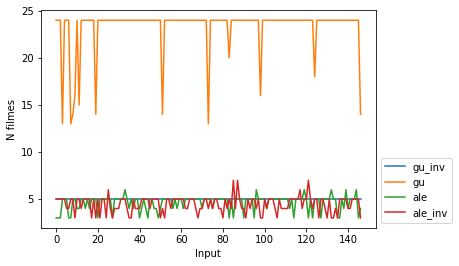

In [20]:
plt.plot(df_gu_inv.index,df_gu_inv.tamanho,label='gu_inv',linewidth=1.5)
plt.plot(df_gu.index,df_gu.tamanho,label='gu',linewidth=1.5)
plt.plot(df_ale.index,df_ale.tamanho,label='ale',linewidth=1.5)
plt.plot(df_ale_inv.index,df_ale_inv.tamanho,label='ale_inv',linewidth=1.5)

plt.ylabel("N filmes")
plt.xlabel("Input")
plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show() #[sum(x) for x in zip(list1, list2)]

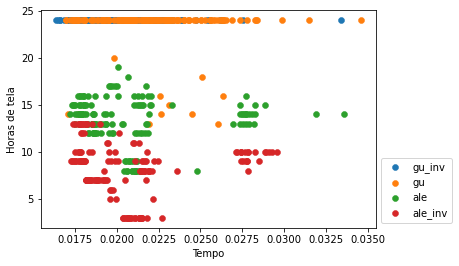

In [27]:
df_gu_inv = df_gu_inv.sort_values(by=['Tempo'])
df_gu = df_gu.sort_values(by=['Tempo'])
df_ale = df_ale.sort_values(by=['Tempo'])
df_ale_inv = df_ale_inv.sort_values(by=['Tempo'])

plt.scatter(df_gu_inv.Tempo,df_gu_inv.horas,label='gu_inv',linewidth=0.5)
plt.scatter(df_gu.Tempo,df_gu.horas,label='gu',linewidth=0.5)
plt.scatter(df_ale.Tempo,df_ale.horas,label='ale',linewidth=0.5)
plt.scatter(df_ale_inv.Tempo,df_ale_inv.horas,label='ale_inv',linewidth=0.5)

plt.ylabel("Horas de tela")
plt.xlabel("Tempo")
plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show() #[sum(x) for x in zip(list1, list2)]

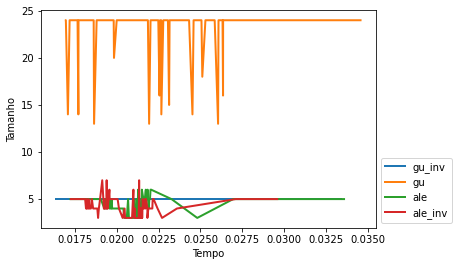

In [30]:
df_gu_inv = df_gu_inv.sort_values(by=['Tempo'])
df_gu = df_gu.sort_values(by=['Tempo'])
df_ale = df_ale.sort_values(by=['Tempo'])
df_ale_inv = df_ale_inv.sort_values(by=['Tempo'])

plt.plot(df_gu_inv.Tempo,df_gu_inv.tamanho,label='gu_inv',linewidth=2)
plt.plot(df_gu.Tempo,df_gu.tamanho,label='gu',linewidth=2)
plt.plot(df_ale.Tempo,df_ale.tamanho,label='ale',linewidth=2)
plt.plot(df_ale_inv.Tempo,df_ale_inv.tamanho,label='ale_inv',linewidth=2)

plt.ylabel("Tamanho")
plt.xlabel("Tempo")
plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show() #[sum(x) for x in zip(list1, list2)]

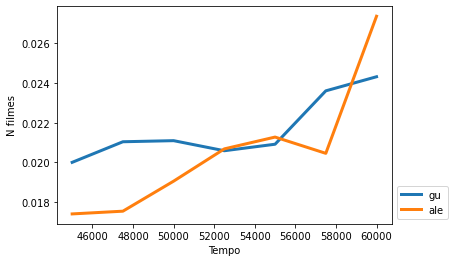

In [13]:
temp1 = df_gu_inv[df_gu_inv['n_cat']==10].sort_values(by=['n_filmes'])
temp2 = df_gu[df_gu['n_cat']==10].sort_values(by=['n_filmes'])
temp3 = df_ale[df_ale['n_cat']==10].sort_values(by=['n_filmes'])
temp4 = df_ale_inv[df_ale_inv['n_cat']==10].sort_values(by=['n_filmes'])

#plt.plot(temp1['n_filmes'],temp1.Tempo,label='gu_inv')
plt.plot(temp2['n_filmes'],temp2.Tempo,label='gu',linewidth=3)
plt.plot(temp3['n_filmes'],temp3.Tempo,label='ale',linewidth=3)
#plt.plot(temp4['n_filmes'],temp4.Tempo,label='ale_inv')

plt.xlabel("Tempo")
plt.ylabel("N filmes")
plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show()

plotar isolando filmes e cats

In [14]:
temp2

,Tempo,max,n_filmes,n_cat,tamanho,horas
36,0.019999,54,45000,10,24,24
54,0.021038,55,47500,10,24,24
10,0.021093,60,50000,10,24,24
69,0.020585,60,52500,10,24,24
22,0.020913,51,55000,10,24,24
136,0.023608,51,57500,10,24,24
24,0.024319,56,60000,10,24,24


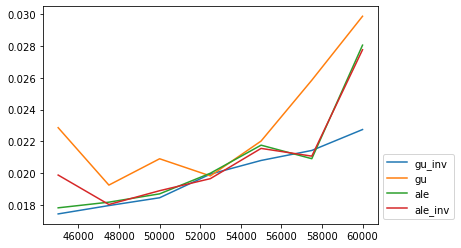

In [16]:
temp1 = df_gu_inv[df_gu_inv['n_cat']==25].sort_values(by=['n_filmes'])
temp2 = df_gu[df_gu['n_cat']==25].sort_values(by=['n_filmes'])
temp3 = df_ale[df_ale['n_cat']==25].sort_values(by=['n_filmes'])
temp4 = df_ale_inv[df_ale_inv['n_cat']==25].sort_values(by=['n_filmes'])
plt.plot(temp1['n_filmes'],temp1.Tempo,label='gu_inv')
plt.plot(temp2['n_filmes'],temp2.Tempo,label='gu')
plt.plot(temp3['n_filmes'],temp3.Tempo,label='ale')
plt.plot(temp4['n_filmes'],temp4.Tempo,label='ale_inv')

plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show()

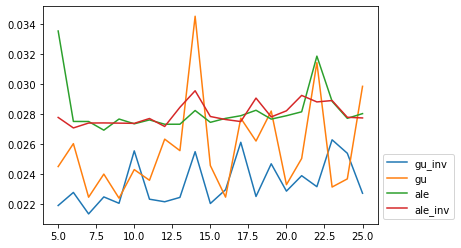

In [23]:
temp1 = df_gu_inv[df_gu_inv['n_filmes']==60000].sort_values(by=['n_cat'])
temp2 = df_gu[df_gu['n_filmes']==60000].sort_values(by=['n_cat'])
temp3 = df_ale[df_ale['n_filmes']==60000].sort_values(by=['n_cat'])
temp4 = df_ale_inv[df_ale_inv['n_filmes']==60000].sort_values(by=['n_cat'])

plt.plot(temp1['n_cat'],temp1.Tempo,label='gu_inv')
plt.plot(temp2['n_cat'],temp2.Tempo,label='gu')
plt.plot(temp3['n_cat'],temp3.Tempo,label='ale')
plt.plot(temp4['n_cat'],temp4.Tempo,label='ale_inv')

plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show()

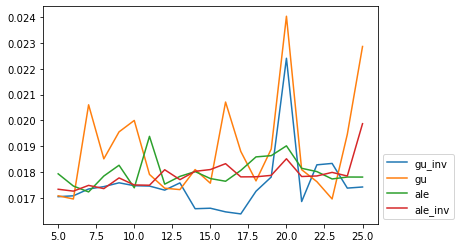

In [24]:
temp1 = df_gu_inv[df_gu_inv['n_filmes']==45000].sort_values(by=['n_cat'])
temp2 = df_gu[df_gu['n_filmes']==45000].sort_values(by=['n_cat'])
temp3 = df_ale[df_ale['n_filmes']==45000].sort_values(by=['n_cat'])
temp4 = df_ale_inv[df_ale_inv['n_filmes']==45000].sort_values(by=['n_cat'])

plt.plot(temp1['n_cat'],temp1.Tempo,label='gu_inv')
plt.plot(temp2['n_cat'],temp2.Tempo,label='gu')
plt.plot(temp3['n_cat'],temp3.Tempo,label='ale')
plt.plot(temp4['n_cat'],temp4.Tempo,label='ale_inv')

plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show()

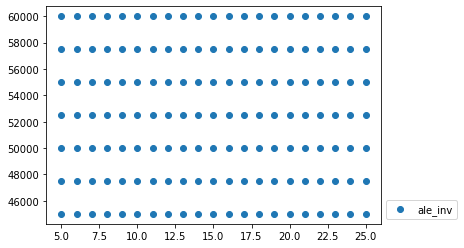